In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import joblib


In [55]:
df = pd.read_csv('dados_treino_v8.csv', sep='|')
df.head()

,internacao,DT_ATENDIMENTO,MP10,O3,TEMP,UR,DS_CID,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,ENTRE_5_9_ANOS,ENTRE_10_14_ANOS,ENTRE_15_18_ANOS,TP_SEXO
0,0,2022-01-01,28.620098,31.930049,21.833099,80.276419,AMIGDALITE AGUDA NAO ESPECIFICADA,0,0,0,1,0,0,0,0,1,F
1,0,2022-01-01,22.559984,28.459289,21.524707,81.938460,ASMA NAO ESPECIFICADA,0,0,0,1,0,1,0,0,0,M
2,0,2022-01-01,23.173989,29.115721,20.771323,87.768694,BRONQUIOLITE AGUDA,0,0,0,1,1,0,0,0,0,M
3,1,2022-01-01,29.538983,30.253300,21.908878,79.161412,BRONQUIOLITE AGUDA DEVIDA A VIRUS SINCICIAL RE...,0,0,0,1,1,0,0,0,0,F
4,0,2022-01-01,33.311234,26.157899,21.339680,81.960879,BRONQUITE AGUDA NAO ESPECIFICADA,0,0,0,1,0,1,0,0,0,M


In [56]:
df = pd.get_dummies(df, columns=["TP_SEXO", "DS_CID"], dtype='int')
df.head()

,internacao,DT_ATENDIMENTO,MP10,O3,TEMP,UR,outono,inverno,primavera,verao,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,0,2022-01-01,28.620098,31.930049,21.833099,80.276419,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,2022-01-01,22.559984,28.459289,21.524707,81.938460,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2022-01-01,23.173989,29.115721,20.771323,87.768694,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,2022-01-01,29.538983,30.253300,21.908878,79.161412,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2022-01-01,33.311234,26.157899,21.339680,81.960879,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
headers = list(df.columns)[5:]
X = df[headers]
y = df['internacao']
df[headers].head()

,UR,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,ENTRE_5_9_ANOS,ENTRE_10_14_ANOS,ENTRE_15_18_ANOS,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,80.276419,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,81.938460,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87.768694,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,79.161412,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,81.960879,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# colunas_normalizar = ['MP10', 'O3', 'TEMP', 'UR']
# X.loc[:, colunas_normalizar] = scaler.fit_transform(X.loc[:, colunas_normalizar])
# X[headers].head()


In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [60]:
from imblearn.over_sampling import SMOTEN
smote = SMOTEN()
X_train, y_train = smote.fit_resample(X_train, y_train)

logistic_regression= LogisticRegression(max_iter=5000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
# joblib.dump(logistic_regression, "dados_treino_2022.pkl")

<Axes: xlabel='Predicted', ylabel='Actual'>

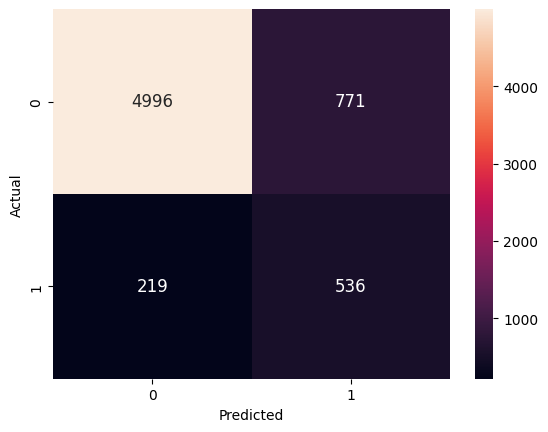

In [61]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 12}, fmt='d')

In [62]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

recall = metrics.recall_score(y_test, y_pred)
print('Sensitivity (Recall):', recall)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)

print ('Specificity: ', specificity)

precisao = tp / (tp + fp)
print('Precisão:', precisao)

NPV = tn / (tn + fn)
print('NPV:', NPV)

Accuracy:  0.8482060717571297
Sensitivity (Recall): 0.7099337748344371
Specificity:  0.8663083058782729
Precisão: 0.41009946442234124
NPV: 0.9580057526366251


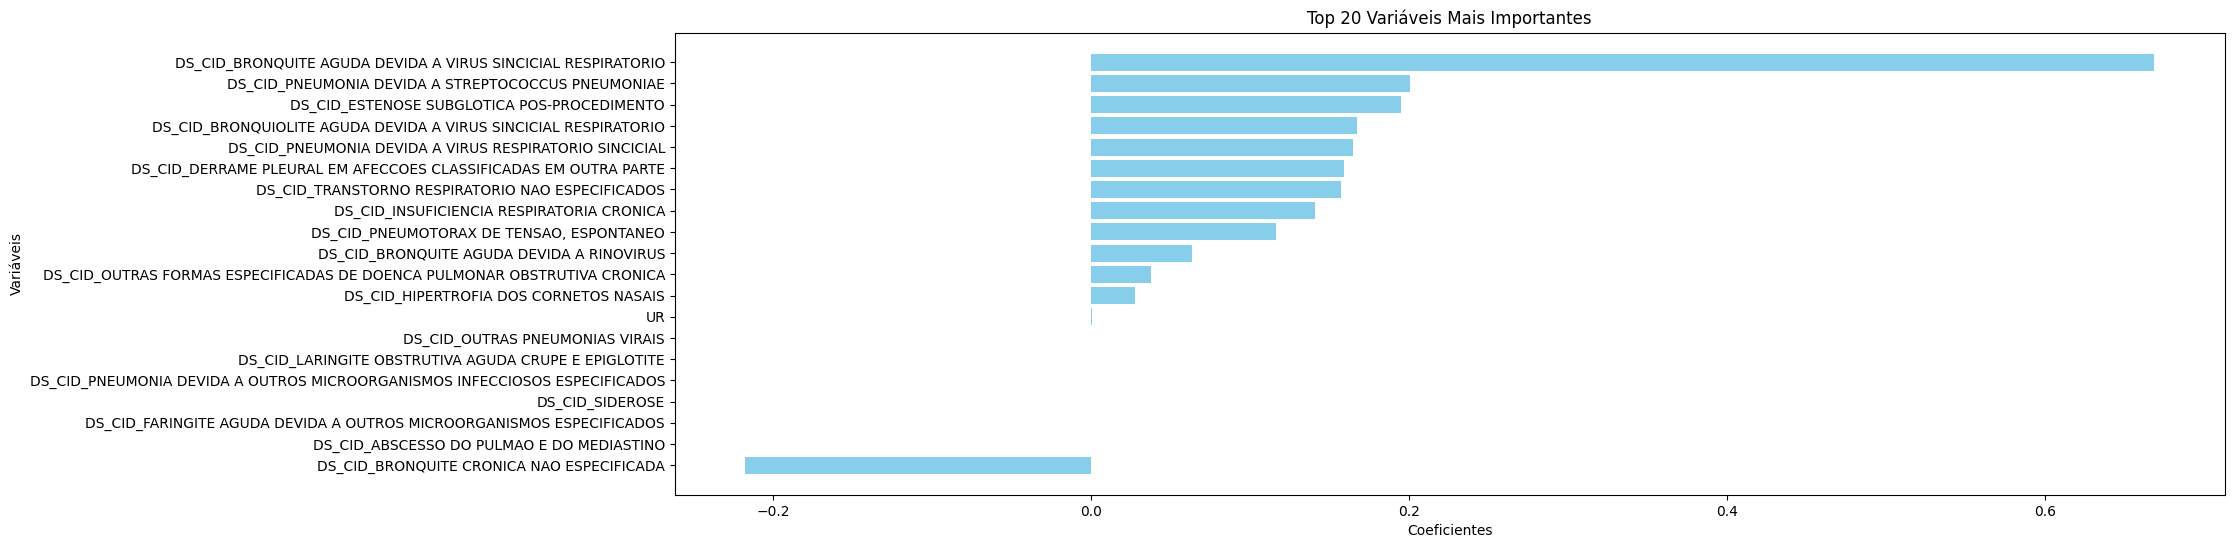

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Obtendo os coeficientes e nomes das variáveis
coeficientes = logistic_regression.coef_[0]
nomes_variaveis = X_train.columns  # Substitua por seus próprios nomes de variáveis

# Criando um índice para classificar os coeficientes
indices_ordenados = np.argsort(coeficientes)

# Selecionando os 10 coeficientes mais importantes
top_10_coeficientes = coeficientes[indices_ordenados][-20:]
top_10_variaveis = nomes_variaveis[indices_ordenados][-20:]

# Criando o gráfico de barras
plt.figure(figsize=(20,6))
plt.barh(top_10_variaveis, top_10_coeficientes, color='skyblue')
plt.xlabel('Coeficientes')
plt.ylabel('Variáveis')
plt.title('Top 20 Variáveis Mais Importantes')
plt.show()
